Prediction of credit card fraud

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
df=pd.read_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/data/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

Checking the null values

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

Checking the distribution of V1

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


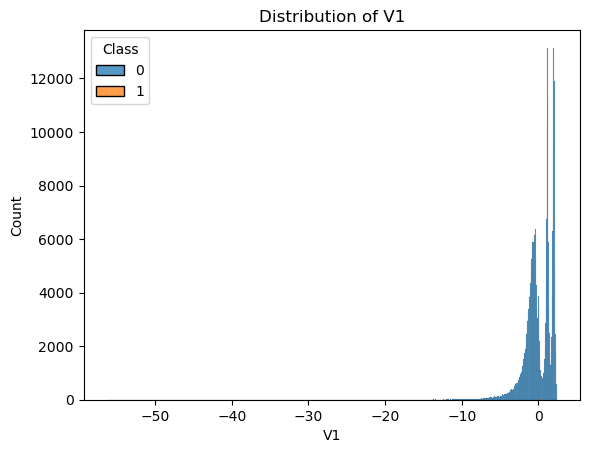

In [8]:
sns.histplot(data=df,x='V1',hue='Class',multiple='stack', kde=False)
plt.title("Distribution of V1")
plt.show()

Dropping Time column

In [10]:
df.drop(columns=['Time'],inplace=True)

Splitting independent and dependent variables

In [11]:
X=df.drop(columns=['Class'])
y=df['Class']

Getting unique values of y

In [12]:
y.unique()

array([0, 1])

Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
numerical_transformer=StandardScaler()

In [15]:
X_Scaled=numerical_transformer.fit_transform(X)

Splitting the data for training and testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

Copying the data to data folder

In [18]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
X_test=pd.DataFrame(data=X_test,columns=X.columns)
y_train=pd.DataFrame(data=y_train)
y_test=pd.DataFrame(data=y_test)

In [19]:
X_train.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/data/X_train.csv")
X_test.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/data/X_test.csv")
y_train.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/data/y_train.csv")
y_test.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/data/y_test.csv")

Modeling using random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [21]:
rf = RandomForestClassifier(random_state=42)

In [22]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [0.025,0.05,0.1,0.25,0.5],     # Minimum number of samples to split an internal node     
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

In [23]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

In [24]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [0.025, 0.05, 0.1,
                                                              0.25, 0.5],
                                        'n_estimators': [10, 20, 50, 100]},
                   random_state=42, verbose=2)

[CV] END bootstrap=False, max_depth=10, min_samples_split=0.05, n_estimators=20; total time=  55.3s
[CV] END bootstrap=False, max_depth=30, min_samples_split=0.025, n_estimators=20; total time= 2.2min
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.25, n_estimators=100; total time= 7.6min
[CV] END bootstrap=True, max_depth=10, min_samples_split=0.1, n_estimators=20; total time=  44.9s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.025, n_estimators=20; total time= 1.3min
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.025, n_estimators=20; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.1, n_estimators=100; total time= 7.1min
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.1, n_estimators=10; total time=  29.6s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.1, n_estimators=10; total time=  25.5s
[CV] END bootstrap=False, max_depth=30, min_samples_split=0.025, n_estimators=20; total time= 2.3min
[

In [25]:
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 20, 'min_samples_split': 0.025, 'max_depth': 10, 'bootstrap': False}


Fitting the best model

In [26]:
best_rf = rf_random.best_estimator_

Checking the accuracy of test and train data

In [27]:
y_pred_test = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test}")
y_pred_train=best_rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on the train set: {accuracy_train}")

Accuracy on the test set: 0.9991748885221726
Accuracy on the train set: 0.99923632293884


We can see accuracy over 99% for both test and train data

Saving the model

In [28]:
import joblib

In [29]:
joblib.dump(best_rf, "/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/model/best_random_forest_model.pkl")

['/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/model/best_random_forest_model.pkl']

Load the model for testing again

In [33]:
best_rf_loaded = joblib.load('/Users/kuriankgeorge/Desktop/aws/Capstone/02_Find_Default/model/best_random_forest_model.pkl')

In [34]:
y_pred_test = best_rf_loaded.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test}")

Accuracy on the test set: 0.9991748885221726
